In [31]:
import urllib
import os
import zipfile

In [23]:
def make_directory(local_directory):
    root_dir = os.path.abspath('.')
    path = os.path.join(root_dir, local_directory)
    if os.path.exists(path):
        return path
    else:
        os.mkdir(path)
    return path
    

In [42]:
root_dir = os.path.abspath('.')
tmp_dir = os.path.join(root_dir, 'tmp')

In [29]:
make_directory('tmp')
#local paths do work
urllib.request.urlretrieve("https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",  'tmp/' + 'cats_and_dogs_filtered.zip')

('tmp/cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x1936410a6d0>)

In [43]:
local_zip = 'tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
# only full paths work for extracting
zip_ref.extractall(tmp_dir)
zip_ref.close()

In [45]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [47]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:9])
print(train_dog_fnames[:9])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg']


In [48]:
print('total training cat images :', len(os.listdir( train_cats_dir )))
print('total training dog images :', len(os.listdir( train_dogs_dir )))

print('total validation cat images :', len(os.listdir( validation_cats_dir )))
print('total validation cat images :', len(os.listdir( validation_dogs_dir )))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation cat images : 500


In [51]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0

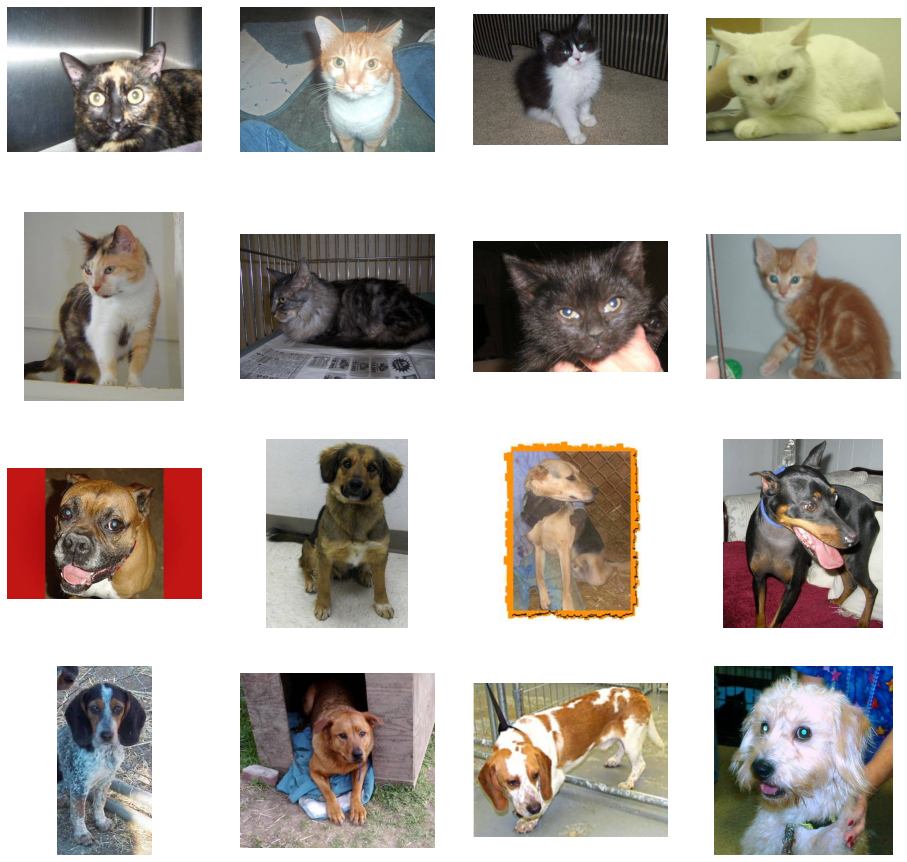

In [57]:
# time to build our model
import tensorflow as tf

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [61]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be rescaled by 1./255.

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [65]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   validation_steps=50,
                   verbose=2)

Epoch 1/15
100/100 - 26s - loss: 0.7934 - accuracy: 0.5500 - val_loss: 0.6701 - val_accuracy: 0.6650
Epoch 2/15
100/100 - 17s - loss: 0.6491 - accuracy: 0.6590 - val_loss: 0.6573 - val_accuracy: 0.6060
Epoch 3/15
100/100 - 17s - loss: 0.5609 - accuracy: 0.7095 - val_loss: 0.5849 - val_accuracy: 0.7070
Epoch 4/15
100/100 - 17s - loss: 0.4964 - accuracy: 0.7755 - val_loss: 0.5773 - val_accuracy: 0.6940
Epoch 5/15
100/100 - 17s - loss: 0.4180 - accuracy: 0.8000 - val_loss: 0.6255 - val_accuracy: 0.7050
Epoch 6/15
100/100 - 17s - loss: 0.3374 - accuracy: 0.8510 - val_loss: 0.6353 - val_accuracy: 0.7090
Epoch 7/15
100/100 - 17s - loss: 0.2364 - accuracy: 0.9055 - val_loss: 0.8157 - val_accuracy: 0.7100
Epoch 8/15
100/100 - 17s - loss: 0.1820 - accuracy: 0.9245 - val_loss: 0.8544 - val_accuracy: 0.7170
Epoch 9/15
100/100 - 17s - loss: 0.1212 - accuracy: 0.9550 - val_loss: 0.9060 - val_accuracy: 0.7110
Epoch 10/15
100/100 - 17s - loss: 0.1027 - accuracy: 0.9685 - val_loss: 1.2829 - val_accura

In [72]:
import numpy as np
from tensorflow.keras.preprocessing import image

path = os.path.join(root_dir, 'tmp/cat.jpg')

img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0] > 0:
    print("It's a dog")
else:
    print("It's a cat")
    
[layer.name for layer in model.layers]

[0.]
It's a cat


['conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4',
 'flatten',
 'dense',
 'dense_1']

9
9


<ipython-input-80-c93c5ebdd592>:42: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


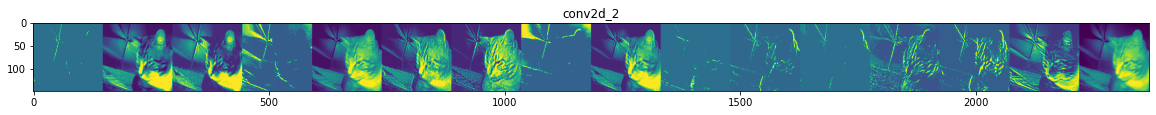

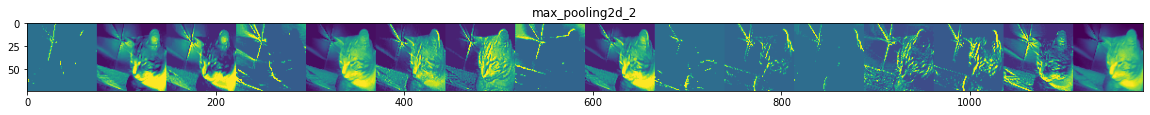

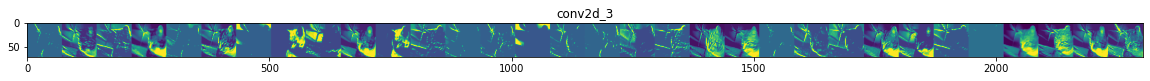

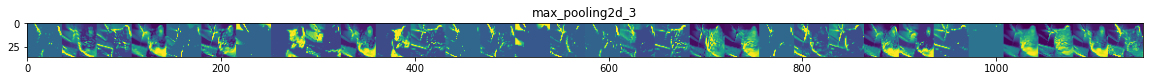

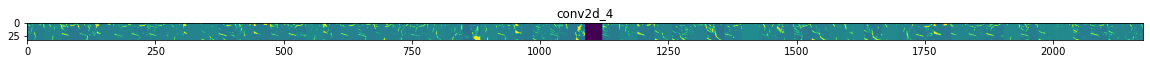

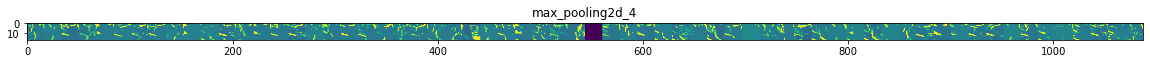

In [80]:

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers]

# visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = np.random.choice(cat_img_files + dog_img_files)
img = image.load_img(img_path, target_size=(150, 150)) # this is a PIL image

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
print(len(layer_names))
print(len(model.layers))
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    
    if len(feature_map.shape) == 4:
        
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        
        # we will tile our images in the matrix
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
            
            
        scale = 20. /n_features
        plt.figure( figsize=(scale * n_features, scale))
        plt.title( layer_name )
        plt.grid ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis')